In [1]:
"""
    Logistic regression classifier
        score
        plotting weights = "learned digit"
"""

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
np.shape(x_train)

(60000, 28, 28)

In [6]:
print(x_train[0].round(1))

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.1 0.5 0.5
  0.7 0.1 0.7 1.  1.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.4 0.6 0.7 1.  1.  1.  1.  1.
  0.9 0.7 1.  0.9 0.8 0.3 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.2 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.
  0.4 0.3 0.3 0.2 0.2 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.9 1.  1.  1.  1.  1.  0.8 0.7 1.  0

7

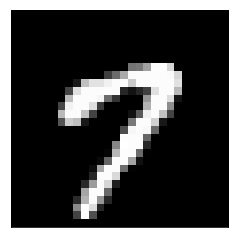

In [10]:
plt.imshow(x_train[15],cmap='gray')
plt.xticks([])
plt.yticks([])
y_train[15]

In [11]:
clf = LogisticRegression(C=1e15,
                         multi_class='multinomial', penalty='l2',solver='sag', tol=0.01)
# fit data
clf.fit(np.array(x_train).reshape((60000,784))[:10000], y_train[:10000])

# compute accuracy
score = clf.score(np.array(x_test).reshape((10000,784)), y_test)

In [12]:
score

0.9034

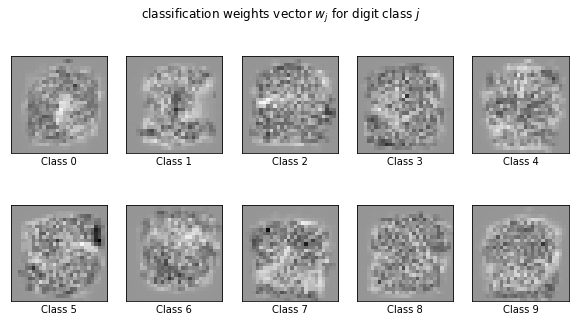

In [13]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

In [28]:
score

0.9029

In [14]:
clf.predict(np.array(x_test).reshape((10000,784))[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [15]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

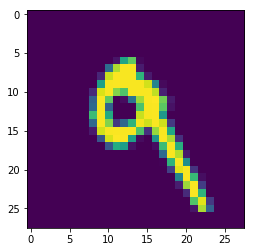

In [17]:
plt.imshow(x_test[7])